Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

## Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


## Загрузка данных

In [2]:
df = pd.read_csv('Проект_1_Задание_2.csv', sep = ';')

## Анализ данных

In [3]:
df.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 404770 entries, 0 to 404769
,Data columns (total 3 columns):
, #   Column     Non-Null Count   Dtype 
,---  ------     --------------   ----- 
, 0   user_id    404770 non-null  int64 
, 1   revenue    404770 non-null  int64 
, 2   testgroup  404770 non-null  object
,dtypes: int64(2), object(1)
,memory usage: 9.3+ MB


In [5]:
df.user_id.unique().shape

(404770,)

In [6]:
df.isnull().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

Посмотрели тип данных, количество и проверили,что пустых строк нет. Посмотрим на соотношение платящих и неплатящих пользователей

In [7]:
df_pay = df.query('revenue > 0')
df_count = df.user_id.count()
df_pay_count = df_pay.user_id.count()
df_pay.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 3733 entries, 72 to 404767
,Data columns (total 3 columns):
, #   Column     Non-Null Count  Dtype 
,---  ------     --------------  ----- 
, 0   user_id    3733 non-null   int64 
, 1   revenue    3733 non-null   int64 
, 2   testgroup  3733 non-null   object
,dtypes: int64(2), object(1)
,memory usage: 116.7+ KB


In [8]:
print(f'''Всего пользователей {df_count}
Заплативших пользователей {df_pay_count}
Конверсия в платящих {round((df_pay_count/df_count)*100,2)}%''')

Всего пользователей 404770
,Заплативших пользователей 3733
,Конверсия в платящих 0.92%


Так как число незаплативших пользователей значительно больше, то график по всем пользователям будет неинформативным. Построим график по платящим с разбиением на группы

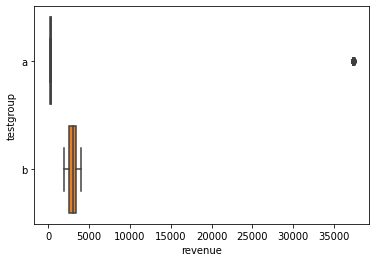

In [9]:
sns.boxplot(data = df_pay, x = 'revenue',y = 'testgroup')

Разобьём данные по группам и построим график violinplot для каждой группы платящих

In [10]:
#разбиение по группам всех пользователей
test_a = df.query('testgroup == "a"')
test_b = df.query('testgroup == "b"')
#разбиение по группам платящих
test_a_sales = test_a.query('revenue != 0').sort_values(by ='revenue')
test_b_sales = test_b.query('revenue != 0').sort_values(by ='revenue')

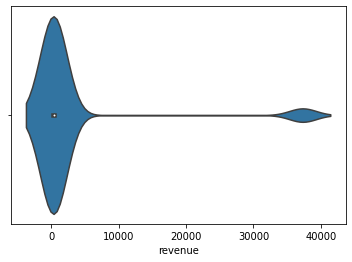

In [11]:
sns.violinplot(data = test_a_sales, x = 'revenue')

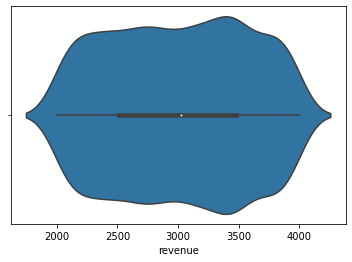

In [12]:
sns.violinplot(data = test_b_sales, x = 'revenue')

In [13]:
#число пользователей из группы а,отличающееся от остальных
test_a_sales.query('revenue > 30000').user_id.count()

123

In [14]:
#сумма покупок на этих пользователей
test_a_sales_big = test_a_sales.query('revenue > 30000').revenue.sum()
test_a_sales_big

4590252

In [15]:
#сумма покупок всех пользователей из группы а
test_a_sales_all = test_a_sales.revenue.sum()
test_a_sales_all

5136189

In [16]:
#доля покупок на пользователей с покупками > 30000
test_a_sales_big/test_a_sales_all

0.8937077665950377

По графикам видим,что в группе 'а' присутствует 123 пользователя,выручка которых значительно отличается от остальных. Доля прибыли на этих пользователей составляет 89% в группе 'a'.Проанализируем две группы, посмотрим описательную статистику и расчитаем метрики:
1. Средний доход на пользователя (ARPU)
2. Средний доход на платящего пользователя(ARPPU)
3. Выручка (Revenue)
4. Конверсия в платящего(CR)


In [17]:
test_a_sales.revenue.describe()

count     1928.000000
mean      2663.998444
std       9049.039763
min        200.000000
25%        257.000000
50%        311.000000
75%        361.000000
max      37433.000000
Name: revenue, dtype: float64

In [18]:
test_b_sales.revenue.describe()

count    1805.000000
mean     3003.658172
std       572.619709
min      2000.000000
25%      2513.000000
50%      3022.000000
75%      3478.000000
max      4000.000000
Name: revenue, dtype: float64

In [20]:
#средняя цена в группах
mean_a = test_a_sales.revenue.mean()
mean_b = test_b_sales.revenue.mean()
#медианная цена товаров в группах(так как есть выбросы)
median_a = test_a_sales.revenue.median()
median_b = test_b_sales.revenue.median()
#максимальная покупка
max_a = test_a_sales.revenue.max()
max_b = test_b_sales.revenue.max()
#минимальная покупка
min_a = test_a_sales.revenue.min()
min_b = test_b_sales.revenue.min()
#выручка 
rev_a = test_a.revenue.sum()
rev_b = test_b.revenue.sum()
# средний доход на пользователя 
arpu_a = test_a.revenue.sum()/len(test_a)
arpu_b = test_b.revenue.sum()/len(test_b)
#средний доход на платящего пользователя 
arppu_a = test_a.revenue.sum()/ len(test_a_sales)
arppu_b = test_b.revenue.sum()/ len(test_b_sales)
#конверсия d %
cr_a = (test_a_sales.revenue.count() / test_a.revenue.count())*100
cr_b = (test_b_sales.revenue.count() / test_b.revenue.count())*100

#делаем кортеж из значений
rezult = {'mean':[mean_a,mean_b],'median':[median_a,median_b],'max':[max_a,max_b],'min':[min_a,min_b],
          'rev':[rev_a,rev_b],'arpu':[arpu_a,arpu_b],'arppu':[arppu_a,arppu_b],'cr':[cr_a,cr_b]}
#переводим кортеж в датафрейм
df_rezult = pd.DataFrame(rezult,index = ['a','b']).round(2)
#добавляем ещё 1 строку с разницей значений (b-a)
df_rezult = df_rezult.append(df_rezult.diff().tail(1))
df_rezult.index = ['a','b','b - a']
df_rezult

,mean,median,max,min,rev,arpu,arppu,cr
a,2664.00,311.0,37433.0,200.0,5136189.0,25.41,2664.00,0.95
b,3003.66,3022.0,4000.0,2000.0,5421603.0,26.75,3003.66,0.89
b - a,339.66,2711.0,-33433.0,1800.0,285414.0,1.34,339.66,-0.06


Проанализировав группы можем сказать,что в группе 'а' медианная покупка составляет 311 единиц.Большинство пользователей совершали покупке около этой цены. 123 человека совершили покупку свыше 30 000 единиц, что составило 89% всей прибыли. В группе 'b' медианная покупка 2711 и все пользователи покупали по цене от 2000 до 4000 единиц. ARPU,ARPPU лучше в группе 'b',а вот конверсия в группе 'a'. Проверим статзначимость изменений ARPU,ARPPU,CONV. Так как число пользователей у нас большое,то будем пренебрегать условием нормальности распределения. Для ARPU,ARPPU проверим равенство дисперсий тестом Левена и используем t-тест. Если дисперсии не равны,введём поправку Уэлча. Для конверсии используем критерий хи-квадрат   

Исходные данные test_a и test_b.Гипотезы:
H0 - нулевая гипотеза,дисперсии равны
H1 - дисперсии статзначимо отличаются

In [22]:
#тест Левена для ARPU
stat_levene, p_value_levene_arpu = stats.levene(test_a.revenue, test_b.revenue,center = 'mean')
print(f'p-value = {p_value_levene_arpu}')
if p_value_levene_arpu > 0.05:
    print('Нет оснований отклонить нулевую гипотезу, дисперсии статзначимо не отличаются, используем t-тест')
else:
    print('Есть основания отклонить нулевую гипотезу, дисперсии статзначимо отличаются, используем t-тест с поправкой Уэлча')
    

p-value = 0.2091420343022563
,Нет оснований отклонить нулевую гипотезу, дисперсии статзначимо не отличаются, используем t-тест


Исходные данные test_a и test_b. Гипотезы:<br>
H0 - нулевая гипотеза,ARPU не отличаются<br>
H1 - ARPU статзначимо отличаются

In [23]:
#t-тест для ARPU
t_statistic, p_value_arpu = stats.ttest_ind(test_a.revenue, test_b.revenue)
print(f'p-value = {p_value_arpu}')
if p_value_arpu > 0.05:
    print('Нет оснований отклонить нулевую гипотезу, ARPU статзначимо не отличаются')
else:
    print('Есть основания отклонить нулевую гипотезу, ARPU статзначимо отличаются')

p-value = 0.532494858971837
,Нет оснований отклонить нулевую гипотезу, ARPU статзначимо не отличаются


In [24]:
#тест Левена для ARPPU
stat_levene, p_value_levene_arppu = stats.levene(test_a_sales.revenue, test_b_sales.revenue,center = 'mean')
print(f'p-value = {p_value_levene_arppu}')
if p_value_levene_arppu > 0.05:
    print('Нет оснований отклонить нулевую гипотезу, дисперсии статзначимо не отличаются, используем t-тест')
else:
    print('Есть основания отклонить нулевую гипотезу, дисперсии статзначимо отличаются, используем t-тест с поправкой Уэлча')

p-value = 1.3202514573715939e-93
,Есть основания отклонить нулевую гипотезу, дисперсии статзначимо отличаются, используем t-тест с поправкой Уэлча


In [25]:
#t-тест для ARPPU с поправкой Уэлча
t_statistic, p_value_arppu = stats.ttest_ind(test_a_sales.revenue, test_b_sales.revenue,equal_var=False)
print(f'p-value = {p_value_arppu}')
if p_value_arppu > 0.05:
    print('Нет оснований отклонить нулевую гипотезу, ARPU статзначимо не отличаются')
else:
    print('Есть основания отклонить нулевую гипотезу, ARPU статзначимо отличаются')

p-value = 0.10020780398916015
,Нет оснований отклонить нулевую гипотезу, ARPU статзначимо не отличаются


Проведя тесты выяснили,что статзначимых отличий в ARPU и ARPPU между двумя группами не наблюдается. Проведём сравнение конверсий в платящих<br>
Н0 - конверсия в платящих не зависит от группы<br>
Н1 - есть статзначимое различие в конверсии в группах

In [26]:
#создаём столбец,если была покупка,то 1,остальное 0
df['rev_true'] = df.revenue.apply(lambda x:0 if x == 0 else 1)
#группируем и переворачиваем таблицу
df_test = df.groupby(['testgroup','rev_true'],as_index = False)\
            .user_id.count()\
            .pivot(index = 'rev_true',columns = 'testgroup',values = 'user_id')
df_test

testgroup,a,b
rev_true,,
0,200175,200862
1,1928,1805


In [30]:
#хи-квадрат 
stats.chi2_contingency(df_test)
print(f'p_values_hi2 = {stats.chi2_contingency(df_test)[1]}')

p_values_hi2 = 0.03647561892312613


#### Так как значение p_values_hi2 < 0.05, то мы отвергаем нулевую гипотезу и считаем, что статзначимые различия в конверсиях есть

## Выводы

Был проведён анализ двух групп с акциями. Первое,на что стоит обратить внимание, так это аномальные значения в группе 'а'. Для начала надо разобраться, действительно ли это результат акции или какие-то ошибки в данных. Второе, на что надо обратить внимание, на что направлены акции. Если затрагивать отдельный сегмент платящих, то можно делать разные выводы. Например,если мы хотим увеличить конверсию в платящих > 30000, то идеален тест 'а', если в средний сегмент,то тест 'b'. Подробности а/в теста нам неизвесты, поэтому с этой точки зрения мы вывод сделать не можем. Если смотреть на 3 метрики ARPU,ARPPU,CR, то в первых двух измененя не статзначимы, CR статзначим, однозначно выбрать группу не можем,нужна дополнительная информация.   